## 📈 Python Lab: Logistic Regression
> [Principles of ML course](https://github.com/mnarimani/PML_Spring2025_SUT) - Spring 2025 - Sharif <br>
> Lab sessions - Session 6 - April 5, 2025 <br>
> Author: M Narimani <br>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mnarimani/PML_Spring2025_SUT/blob/main/Week06/02_Logistic_TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mnarimani/PML_Spring2025_SUT/blob/main/Week06/02_Logistic_TODO.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## 🛠️ Setup: Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

## 1️⃣ Loading and Preparing Data

In [6]:
# Load iris dataset
iris = datasets.load_iris()

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [8]:
X = iris.data[50:, 2:]  # Petal features for Versicolor/Virginica
y = iris.target[50:]-1

In [9]:
print(y[50:])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
# Add bias term and split data
X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add intercept term
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

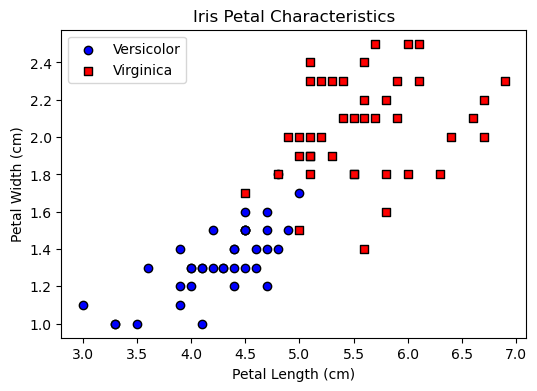

In [11]:
# Plot training data
plt.figure(figsize=(6,4))
plt.scatter(X_train[y_train==0, 1], X_train[y_train==0, 2], 
            c='blue', label='Versicolor', edgecolors='k')
plt.scatter(X_train[y_train==1, 1], X_train[y_train==1, 2], 
            c='red', label='Virginica', marker='s', edgecolors='k')
plt.xlabel('Petal Length (cm)'), plt.ylabel('Petal Width (cm)')
plt.title('Iris Petal Characteristics'), plt.legend()
plt.show()

## 2️⃣ Implementing Logistic Regression
>**TODO**: Sigmoid Function

In [13]:
def sigmoid(z):
    # TODO: Implement the logistic function
    pass

>**TODO**: Cost Function

In [15]:
def compute_cost(X, y, theta):
    # TODO: Calculate log loss
    pass

>**TODO**: Gradient Descent

In [17]:
def gradient_descent(X, y, theta, alpha, iterations):
    # TODO: Implement optimization loop
    # m = len(y)
    # cost_history = []
    # for _ in range(iterations):
    #     h = sigmoid(X @ theta)
    #     gradient = ?
    #     theta = ?
    #     cost_history.append(compute_cost(X, y, theta))
    # return theta, cost_history
    pass

## 3️⃣ Training the Model

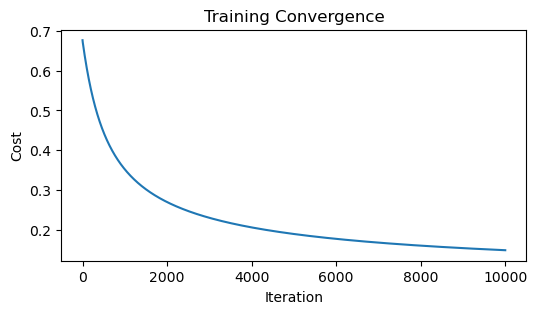

In [19]:
# Initialize parameters
theta = np.zeros(X_train.shape[1])
alpha = 0.1
iterations = 10000

# Train model
theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)

# Plot convergence
plt.figure(figsize=(6,3))
plt.plot(cost_history)
plt.xlabel('Iteration'), plt.ylabel('Cost')
plt.title('Training Convergence')
plt.show()

## 4️⃣ Decision Boundary Visualization

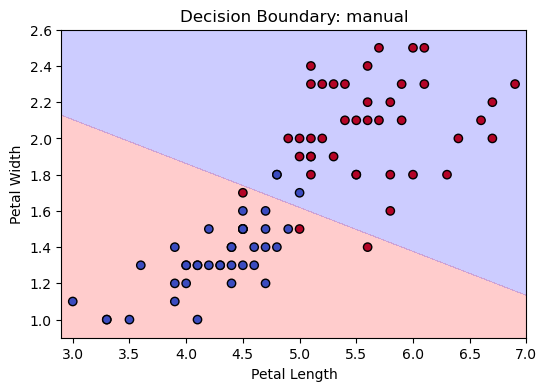

In [21]:
# Create petal-specific mesh grid
x_min, x_max = X[:,1].min()-0.1, X[:,1].max()+0.1  # Petal length range
y_min, y_max = X[:,2].min()-0.1, X[:,2].max()+0.1  # Petal width range
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
Z = sigmoid(np.c_[np.ones((xx.ravel().shape[0], 1)), 
                xx.ravel(), yy.ravel()] @ theta)
Z = Z.reshape(xx.shape)

# Plot with petal labels
plt.figure(figsize=(6,4))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['red', 'blue'], alpha=0.2)
plt.scatter(X_train[:,1], X_train[:,2], c=y_train, 
            cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundary: manual')
plt.show()

## 5️⃣ Validation with Scikit-Learn

In [23]:
from sklearn.linear_model import LogisticRegression

# Train sklearn model
sk_model = LogisticRegression(penalty=None, `random_state=42`)
sk_model.fit(X_train[:,1:], y_train)  # Exclude intercept term

# Compare coefficients
print(f"Our model coefficients: {theta}")
print(f"Scikit-learn coefficients: {np.hstack([sk_model.intercept_, sk_model.coef_.ravel()])}")

Our model coefficients: [-16.21197685   1.3886496    5.72545393]
Scikit-learn coefficients: [-43.23009733   5.80512983   9.00605802]


> **TODO**: Use args `tol=0.01`, `solver='lbfgs'`, `max_iter=100`, etc. in sklearn's LogisticRegression

In [24]:
# Compare accuracy
def accuracy(X, y, theta):
    return np.mean((sigmoid(X @ theta) >= 0.5) == y)

print(f"Our model test accuracy: {accuracy(X_test, y_test, theta):.2f}")
print(f"Scikit-learn test accuracy: {sk_model.score(X_test[:,1:], y_test):.2f}")

Our model test accuracy: 0.90
Scikit-learn test accuracy: 0.90


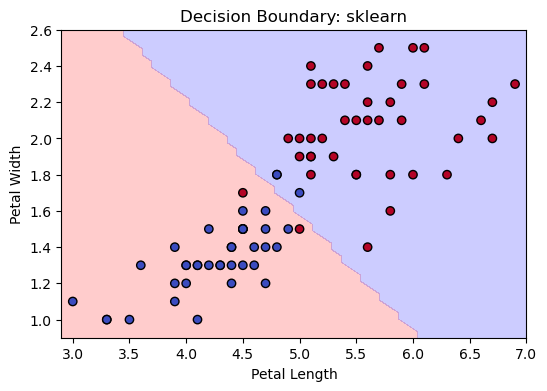

In [25]:
# Create mesh grid for visualization
Z = sk_model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(6,4))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['red', 'blue'], alpha=0.2)
plt.scatter(X_train[:,1], X_train[:,2], c=y_train, 
            cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundary: sklearn')
plt.show()

## 6️⃣ Multiclass Classification with Softmax

In [27]:
# Reload full iris dataset with all 3 classes
X_multi = iris.data[:, 2:]
y_multi = iris.target

# Add bias term and split data
X_multi = np.hstack([np.ones((X_multi.shape[0], 1)), X_multi])
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42)

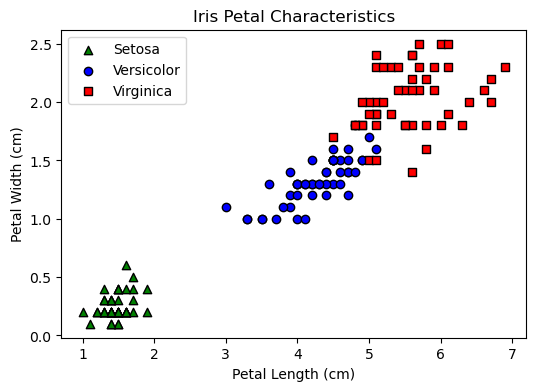

In [28]:
# Plot training data
plt.figure(figsize=(6,4))
plt.scatter(X_multi[y_multi==0, 1], X_multi[y_multi==0, 2], 
            c='green', label='Setosa', marker='^', edgecolors='k')
plt.scatter(X_multi[y_multi==1, 1], X_multi[y_multi==1, 2], 
            c='blue', label='Versicolor', edgecolors='k')
plt.scatter(X_multi[y_multi==2, 1], X_multi[y_multi==2, 2], 
            c='red', label='Virginica', marker='s', edgecolors='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Petal Characteristics')
plt.legend()
plt.show()

### One-hot Encoding

Converts categorical labels into one-hot encoded vectors.

For a label `y_i`, the one-hot encoded vector is:
$$\text{one\_hot}(y_i, k) = [0, 0, \dots, 1, \dots, 0]$$
where the `1` is placed at the index `y_i` (corresponding to the class).

In [30]:
# One-hot encode labels
def one_hot(y, k):
    return np.eye(k)[y]

y_train_oh = one_hot(y_train_m, 3)
y_test_oh = one_hot(y_test_m, 3)

### Softmax Function

$$\text{Softmax}(z_i) = \frac{e^{z_i - \max(z)}}{\sum_{j} e^{z_j - \max(z)}}$$
where:
- $ z $ is the input vector of logits,
- $ \max(z) $ is the maximum value in the vector $ z $ for numerical stability.

>**TODO**: Softmax Function

In [32]:
def softmax(z):
    # TODO: Implement softmax for multiclass probabilities
    pass

### Cross-entropy loss
$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_{ik} \log(h_{ik}) $$
- $ m $ is the number of training examples,
- $ K $ is the number of classes,
- $ y_{ik} $ is the true label for class $ k $ for the $ i $-th example (one-hot encoded),
- $ h_{ik} $ is the predicted probability of the $ i $-th example belonging to class $ k $,

>**TODO**: Multiclass Cost Function

In [34]:
def compute_cost_multi(X, y, theta):
    # TODO: Calculate cross-entropy loss for multiple classes
    pass

>**TODO**: Multiclass Gradient Descent

In [36]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    # TODO: Implement optimization for multiple classes
    # m = X.shape[0]
    # cost_history = []
    # for _ in range(iterations):
    #     h = softmax(X @ theta)
    #     gradient = ?
    #     theta = ?
    #     cost_history.append(compute_cost_multi(X, y, theta))
    # return theta, cost_history
    pass

### Training Multiclass Model

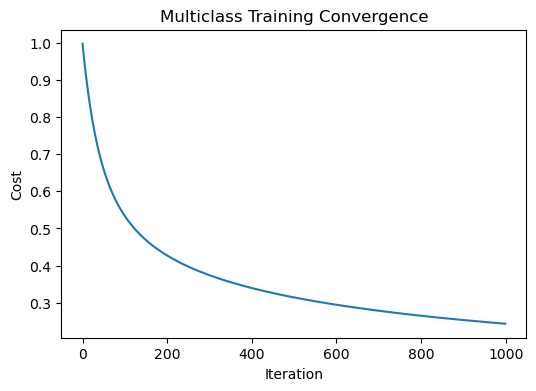

In [38]:
# Initialize parameters (3 classes x 3 parameters)
theta_multi = np.zeros((X_train_m.shape[1], 3))
theta_multi, cost_history_m = gradient_descent_multi(
    X_train_m, y_train_oh, theta_multi, 0.2, 1000)

# Plot convergence
plt.figure(figsize=(6,4))
plt.plot(cost_history_m)
plt.xlabel('Iteration'), plt.ylabel('Cost')
plt.title('Multiclass Training Convergence')
plt.show()

### Multiclass Decision Boundaries

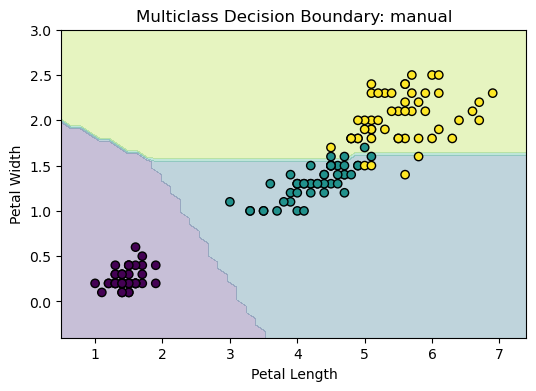

In [40]:
# Create mesh grid for visualization
x_min, x_max = X_multi[:,1].min()-0.5, X_multi[:,1].max()+0.5
y_min, y_max = X_multi[:,2].min()-0.5, X_multi[:,2].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

# Predict probabilities
Z = softmax(np.c_[np.ones((xx.ravel().shape[0], 1)), 
                xx.ravel(), yy.ravel()] @ theta_multi)
Z = np.argmax(Z, axis=1).reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(6,4))
plt.contourf(xx, yy, Z, alpha=0.3, levels=3)
scatter = plt.scatter(X_multi[:,1], X_multi[:,2], c=y_multi, 
            cmap=plt.cm.viridis, edgecolors='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Multiclass Decision Boundary: manual')
plt.show()

### Multiclass Validation

In [42]:
# Compare with scikit-learn's implementation
sk_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs')
sk_multi.fit(X_train_m[:,1:], y_train_m)

print("Our model coefficients:\n", theta_multi)
print("\nScikit-learn coefficients:\n", 
      np.vstack([sk_multi.intercept_.T, sk_multi.coef_.T]))

Our model coefficients:
 [[ 5.93462622  0.0837888  -6.01841502]
 [-1.2078395   0.63465913  0.57318037]
 [-2.39132486 -0.78835071  3.17967556]]

Scikit-learn coefficients:
 [[ 10.39369743   2.91401203 -13.30770947]
 [ -2.59524071   0.0739952    2.52124551]
 [ -1.09048831  -0.74732063   1.83780894]]


In [43]:
# Accuracy comparison
def accuracy_multi(X, y, theta):
    return np.mean(np.argmax(softmax(X @ theta), axis=1) == y)

print(f"Our model test accuracy: {accuracy_multi(X_test_m, y_test_m, theta_multi):.2f}")
print(f"Scikit-learn test accuracy: {sk_multi.score(X_test_m[:,1:], y_test_m):.2f}")

Our model test accuracy: 1.00
Scikit-learn test accuracy: 1.00


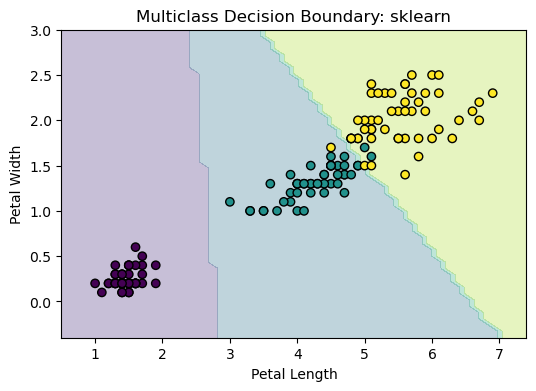

In [44]:
# Predict probabilities
Z = sk_multi.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(6,4))
plt.contourf(xx, yy, Z, alpha=0.3, levels=3)
scatter = plt.scatter(X_multi[:,1], X_multi[:,2], c=y_multi, 
            cmap=plt.cm.viridis, edgecolors='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Multiclass Decision Boundary: sklearn')
plt.show()

## 📚 Exercises
> **Exercise 1**: Try adding the sepal measurements to the model

> **Exercise 2**: Implement L2 regularization in the cost function

> **Exercise 3**: Experiment with different learning rates (try alpha=0.1)